# Week 13

### What Is an SSD1306 OLED Display?
The SSD1306 OLED display is a small, low-power screen commonly used in Arduino, Raspberry Pi Pico, and ESP32 IoT projects. It’s very popular in electronics and maker projects because it’s cheap, easy to program, and produces sharp white or blue graphics.

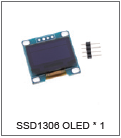

### How It Works (Simple Explanation)
1. Your microcontroller (Pico/ESP32/Arduino) sends commands using I2C.
2. The SSD1306 chip receives those commands.
3. It updates a memory buffer (like a tiny bitmap).
4. That buffer controls each pixel on the OLED screen.

### Example Code
```Python
from machine import Pin, I2C
from ssd1306 import SSD1306_I2C
from time import sleep

# Setup I2C connection
i2c = I2C(0, scl=Pin(13), sda=Pin(12))  # SCL on GP13, SDA on GP12
oled = SSD1306_I2C(128, 64, i2c, addr=0x3C)

# Clear the screen
oled.fill(0)

# Display text
oled.text('Hello OLED!', 0, 0)
oled.text('Hello Mohammed!', 0, 10)
oled.show()

```

### Hardware Requirements
* Breadboard
* SD1306 OLED Display
* Pi Pico
* Jumper wires

## Task 1 - Classroom Mini Weather Station
**Scenario:**
You are building a Classroom Mini Weather Station for your IT lab. The device will sit near the teacher’s desk and continuously show:
* Room temperature (°C)
* Humidity (%)
* Current time
* Current date

The **DHT11** sensor measures the `temperature` and `humidity` in the room. The Raspberry Pi Pico reads this data, gets the time/date from its internal clock, and then displays everything on the **SSD1306 OLED screen**.

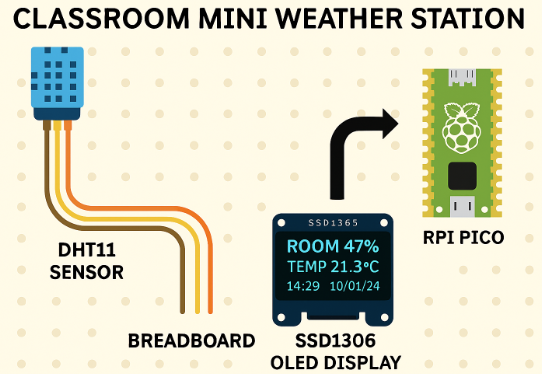

**Teachers can quickly glance at the display to decide:**
* Whether to open a window
* Turn on a fan or heater
* Or use it as a real-time data example during IoT lessons

**Students can extend this project later by:**
* Adding an alarm if the classroom gets too hot/cold
* Logging data to a file or sending it to the cloud
* Using colours/icons (if upgraded to a different display)
  
**Important:**

To use the OLED display, students must download and install the SSD1306 MicroPython library onto the Pico. Without this library, the display code will not run.

### Hardware Requirement 
* Breadboard
* DHT11
* SD1306 OLED Display
* Raspberry Pi Pico
* Jumper wires


### What Is an Ultrasonic Sensor? (HC-SR04)

An ultrasonic sensor is an electronic device used to measure distance by using sound waves. It sends sound waves, waits for the echo, and calculates distance based on how long the echo takes to return.

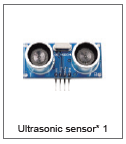 

### How It Works

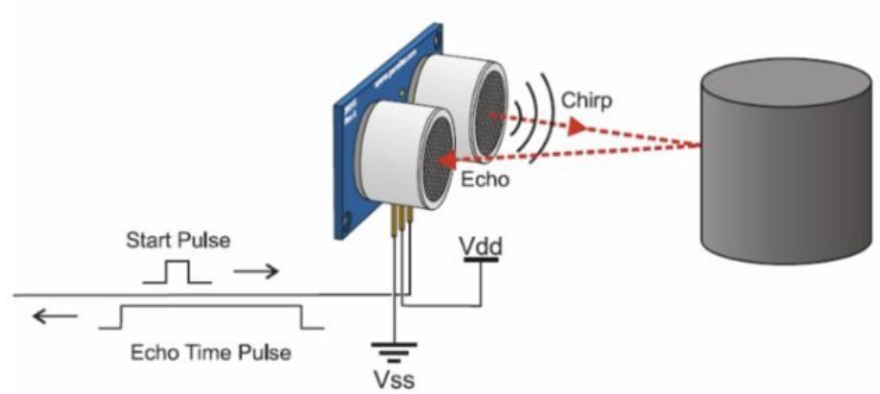

It has two "eyes":

* TRIG → `sends` out a sound pulse
* ECHO → `listens` for the sound coming back

**Here’s the basic process:**
1. The TRIG pin sends a short ultrasonic pulse (sound wave at 40 kHz — humans can’t hear it).
2. The pulse hits an object.
3. The sound bounces back.
4. The ECHO pin measures how long the sound took to return.
5. Using time + speed of sound, the sensor calculates distance.

### Why Use an Ultrasonic Sensor?
* Works day and night
* Works in dark rooms (unlike IR sensors)
* Accurate for 2–400 cm
* Great for robots, IoT devices, alarms, parking sensors

### Typical Uses

* Obstacle detection in robots
* Parking assistance
* Smart bins (detect when full)
* Water level measurement
* Distance meters
* Security/motion detection

### Example code
``` python
from machine import Pin, time_pulse_us
from time import sleep
    
trig = Pin(3, Pin.OUT)
echo = Pin(2, Pin.IN)
    
while True:
    trig.low()
    sleep(0.02)
    trig.high()
    sleep(0.00001)
    trig.low()
    
    duration = time_pulse_us(echo, 1)
    distance = (duration * 0.0343) / 2
    
    print("Distance:", round(distance, 1), "cm")
    sleep(0.2)
```

### Hardware Requirements
* Breadboard
* Ultrasonic Sensor
* Raspberry Pi Pico
* Jumper wires

## What Is a Servo Motor?

A `servo motor` (often just called a `servo`) is a small motor that can rotate to a **specific position** and hold that position accurately.
It is widely used in robotics, IoT projects, RC cars, aircraft, automated doors, grippers, and more.

Unlike a normal DC motor that spins freely, a servo motor can be commanded to move to exact angles such as 0°, 45°, 90°, 180°.

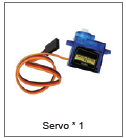

### Key Features of a Servo Motor
**Precise control**
   * A servo rotates to a specific angle, not continuously like a DC motor.
**Built-in control system**
***Inside the servo, there are:***
* A small DC motor
* A set of gears
* A potentiometer (position sensor)
* A control circuit

***This lets the servo:***
* Move to the angle you ask for
* Stay there (hold position)
* Correct itself if pushed.

**Works with PWM**
You control the servo using PWM (Pulse Width Modulation) signals:
* 0.5 ms → near 0°
* 1.5 ms → near 90°
* 2.5 ms → near 180°
**Small and low power**
Runs on **5V**, making it perfect for microcontrollers (Pico, Arduino, ESP32).

### Types of Servo Motors

1. Standard Hobby Servo (most common)
      * Range: 0° to 180°
      * Examples: SG90, MG90S

2. Continuous Rotation Servo
      * Works like a DC motor
      *  PWM controls speed, not angle
    
3. Extended Range Servo
      * Range: 240° or 270°
      * Used in robot arms or pan/tilt systems

### How Does a Servo Work (Simple Explanation)?
1. The microcontroller sends a **PWM** signal.
2. The control circuit reads the desired angle.
3. The motor turns gears.
4. The potentiometer checks the motor’s position.
5. When the motor reaches the correct angle, it stops automatically.

### Servos Are Used

* Robotic arms
* Automated gates and barriers
* Camera pan/tilt systems
* RC cars (steering)
* Model aircraft (aerons, flaps)
* IoT automatic doors
* Smart home devices
* Animatronics

### Example Code 
``` python

from machine import Pin, PWM
from time import sleep

servo = PWM(Pin(17))   # change pin if needed
servo.freq(50)         # standard servo frequency (50Hz)

def pulse(angle):
    # Convert angle (0–180) to microsecond pulse (500–2500 µs)
    us = 500 + (angle / 180) * 2000
    duty = int(us * 65535 / 20000)
    servo.duty_u16(duty)

print("Moving to 0°")
pulse(0)
sleep(2)

print("Moving to 90°")
pulse(90)
sleep(2)
```

## Task 2 - Automatic Parking Gate / Barrier System

**Scenario**

You are designing a Smart Parking Gate for a small car park.
* An ultrasonic sensor is mounted in front of the gate to detect when a car arrives.
* A servo motor controls the barrier arm (or gate), lifting it up when a car is close and lowering it again when the area is clear.


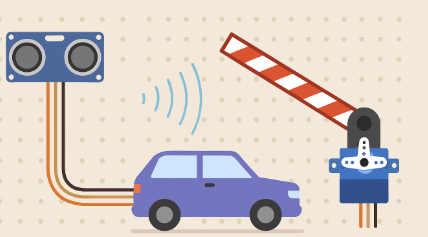

**How it works (simple logic):**

1. The ultrasonic sensor constantly measures the distance in front of the gate.
2. When a car is detected closer than, say, 30–40 cm:
* The servo rotates to raise the barrier (e.g. from 0° to 90°).

3. When the car has passed, and the distance is greater than the threshold:

* The servo rotates back to lower the barrier.

4. You can extend it later with:
* A button to “manual override”
* A buzzer or LEDs to indicate status
* Timing (e.g. keep the gate open for 5 seconds after the car is detected)

This simulates a real-world access control system used in car parks, boom gates, or secure areas and teaches students about:

* Distance measurement with sensors
* Controlling actuators (servo)
* Decision-making with if / else
* Safety and access automation concepts

## Hardware Requirements
* Breadboard
* Ultrasonic Sensor
* Servo motor
* Raspberry Pi Pico
* Jumper wires


## Task 3 - Smart Proximity Alert & Safety Indicator System

**Scenario:**
Your task is to build a Smart Proximity Alert System used in factories, school workshops, hallways, or robot safety zones.

This device detects how close a person or object is using an ultrasonic sensor, then provides three types of feedback:

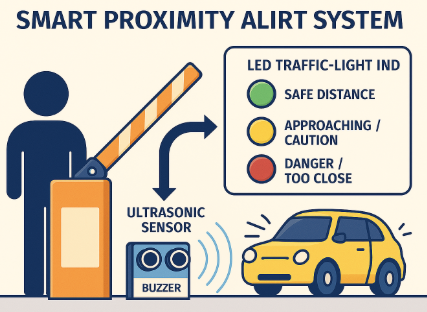

**1. LED Traffic-Light Indicator**
* Green LED  🟢 → Safe distance
* Yellow LED 🟡 → Approaching / caution
* Red LED    🔴 → Danger / too close
  
**2. Audible Warning (Buzzer)**
When an object comes too close, the buzzer activates to give an immediate alert.

**3. Real-time Monitoring**
The Pico continuously reads the distance and updates the visual/audible alerts every 100–300 ms.
This system can be used in:
* Machinery safety zones
* Smart doorway detection
* Parking assistance
* Robotics obstacle detection
* Social distancing or crowd-control
* Smart room entry monitoring

### Hardware Requirements
* Breadboard
* Ultrasonic Sensor
* Three LED Lights (Red, Yellow, Green)
* Passive Bazzer
* Raspberry Pi Pico
* Jumper wires

## Task 4 - Smart Distance-Alert Traffic Light System

**Scenario:**
You are designing a Smart Distance-Alert System for an automated doorway.
This system helps control the flow of people or objects entering a room, hallway, or restricted area.

**The device uses:**
* An ultrasonic sensor to measure the distance of an approaching person/object.
* Three LEDs (Red, Yellow, Green) to show the distance status like a traffic light.
* An SSD1306 OLED display to show the exact distance and system messages.

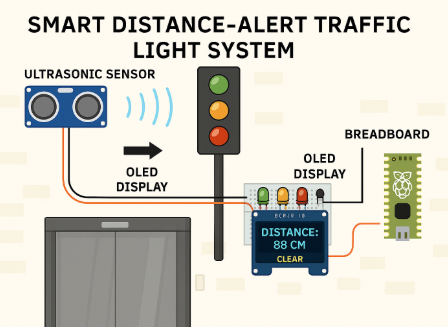

**How the System Works:**
1. Green LED ON 🟢
* The object is far away
* Safe distance
* **OLED shows:** "Distance: XX cm – Clear"
2. Yellow LED ON 🟡
* Object is getting close
* Caution
* **OLED shows:** "Warning – Approaching"
3. Red LED ON 🔴
* Object is very close (below threshold)
* High alert
* **OLED shows:** "STOP – Too Close!"
4. The OLED updates the distance every 1-3s.

### Hardware Requirements
* Breadboard
* Ultrasonic sensor
* SSD1306 OLED Display
* Three LEDS (Red 🟥, Yellow 🟨, Green 🟩)
* Raspberry Pi Pico
* Jumper wire
